In [1]:
import pandas as pd


In [2]:
# We enable automatic processing of quotation marks when reading the file.
df = pd.read_csv('GDP.csv', quotechar='"', skipinitialspace=True)



In [3]:
df.columns = df.columns.str.replace('"', '').str.strip()


In [5]:
df = df.map(lambda x: x.replace('"', '').strip() if isinstance(x, str) else x)

df_long = pd.melt(df, 
                  id_vars=['Country', 'Country_Code'],
                  var_name='Year',
                  value_name='GDP_Per_Capita')

                 

In [6]:
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long['GDP_Per_Capita'] = pd.to_numeric(df_long['GDP_Per_Capita'], errors='coerce')

In [7]:
df_final = df_long.dropna().reset_index(drop=True)

print("The final result, free of nails and cleaned:")
print(df_final.head())

df_final.to_csv('Super_Clean_GDP.csv', index=False)

The final result, free of nails and cleaned:
                Country Country_Code  Year  GDP_Per_Capita
0                 Aruba          ABW  1990    24101.109430
1                Angola          AGO  1990     3089.683369
2               Albania          ALB  1990     2549.473022
3            Arab World          ARB  1990     6808.206995
4  United Arab Emirates          ARE  1990    72906.520120


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


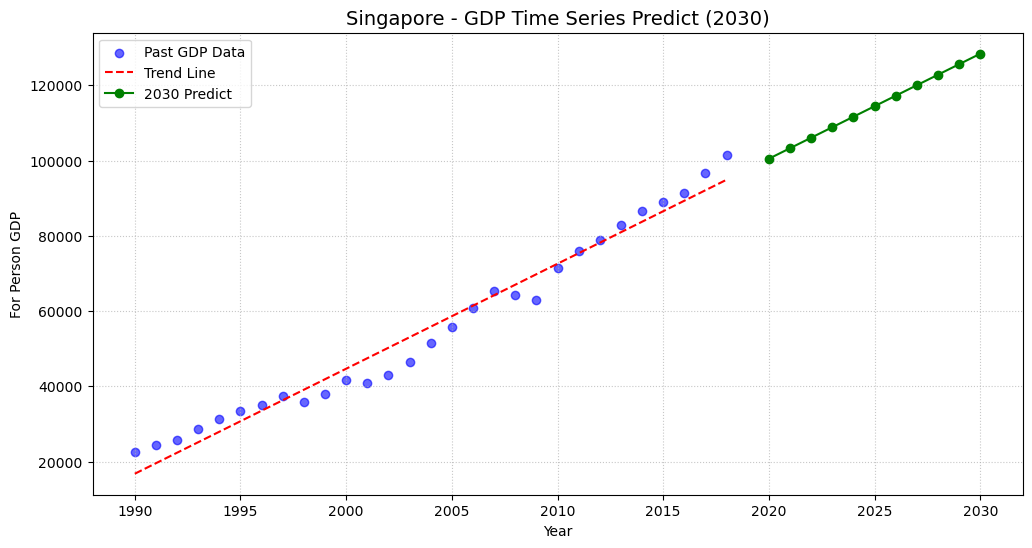

Singapore for 2030 year predict GDP: 128373.41


In [10]:
df = pd.read_csv('Super_Clean_GDP.csv')

country_name ='Singapore'
country_df = df[df['Country'] == country_name].copy()

X = country_df[['Year']].values
y = country_df['GDP_Per_Capita'].values

model = LinearRegression()
model.fit(X, y)

future_years = np.array([[y] for y in range(2020, 2031)])
predictions = model.predict(future_years)

plt.figure(figsize=(12, 6))

plt.scatter(X, y, color='blue', label='Past GDP Data', alpha=0.6)

plt.plot(X, model.predict(X), color='red', linestyle='--', label='Trend Line')

plt.plot(future_years, predictions, color='green', marker='o', label='2030 Predict')

plt.title(f'{country_name} - GDP Time Series Predict (2030)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('For Person GDP')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)

plt.show()

print(f"{country_name} for 2030 year predict GDP: {predictions[-1]:.2f}")

